<font size="12">Project-3: Data Reconstruction & Analysis</font>

<li><font size="4">Class:DAV 5400 Analytics Programming</font>
<li><font size="4">Director:Stefanie Molin </font>
<li><font size="4">Author:Zhengnan Li </font>
<li><font size="4">Student Id: 800763534 </font>

<font size="6">1. Introduction </font>

In this project. I plan to use the dataset of chip of GPU and CPU to analyse the relationship between chip size, Process Size and frequency,etc. The dataset is found in heywhale and you can see it from here:

[Chip of CPU and GPU](https://www.heywhale.com/mw/dataset/64dc9b5000151985794c41a9/content)

This dataset consists of many kinds of Product in different attributes. My research will be useful for those who are interested in chip development situation. More precisely for the people who want to see summary of the currently chip and their size, performance, transistors and frequency etc. So they can know the relationship between different products and attributes, Which benefits a lot because the customer can choose the product suitable for them and the developer can figure out what they need to improve.What's more they can compare them in different vendors and choose the right product they want.

The purpose of the analysis are as followes:
<ol>
<li>  Observe the product number of different vendors
<li>  Observe the influences of chip process size to Frequency
<li>  Observe the relationship between transister and frequency

<font size="6">2. Data Summary </font>

**We will use the package as follows**
<li>Pandas: Data manipulation and analysis library.
<li>Numpy: Numerical computing library.
<li>Matplotlib: Data visualization library.
<li>Seaborn: Statistical data visualization library.

**View the chip table**

In [1]:
# Making a initialization of class
from src.my_package.data_summary import Data_process

#Put my own path here
my_file_path = '/Users/lizhengnan/Desktop/project-3/Project-3-Data-Reconstruction-and-Analysis/src/my_package/data/chip_dataset.csv'
cpu_table = Data_process(my_file_path)
df = cpu_table.view_data()
df.head()

,Product,Type,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/07,65,45,77.0,122,2200,AMD
1,AMD Athlon 200GE,CPU,9/6/18,14,35,192.0,4800,3200,AMD
2,Intel Xeon E5-2603 v2,CPU,9/1/13,22,80,160.0,1400,1800,Intel
3,AMD Phenom II X4 980 BE,CPU,5/3/11,45,125,258.0,758,3700,AMD
4,Intel Xeon E5-2470 v2,CPU,9/1/13,22,95,160.0,1400,2400,Intel


**Check the type**

In [2]:
column_types = df.dtypes
print(column_types)

Product          object
Type             object
Release Date     object
Process Size      int64
TDP               int64
Die Size        float64
Transistors       int64
Freq              int64
Vendor           object
dtype: object


In order to better understand the meaning of the table. Here is the explaination of each column:
<ol>
<li>Product: Description of the products.
<li>Type: Classfication of CPU and GPU.
<li>Release Date:The date of the product publish.
<li>Process Size (nm): The size of the features (the elements that make up the transistors) 
<li>TDP (W): 
Thermal design power is defined as the theoretical maximum amount of heat generated by a CPU or GPU 
<li>Die Size: The die size of a specific chip is the physical dimensions of a bare die
<li>Transistors: tiny electronic switches that can be turned on or off by applying a voltage to their terminals.
<li>Freq: The clock rate of a CPU is normally determined by the frequency of an oscillator crystal.
<li>Vendor:The company to produce the chip

<font size="6"> Exploratory Data Analysis </font>

**In this stage, we will perform exploratory data analysis on the above dataset to answer the above research questions** 

Now we will check if there is any null value present in the dataset

In [3]:
cpu_table.check_data()

Product           0
Type              0
Release Date      0
Process Size      0
TDP               0
Die Size        132
Transistors       0
Freq              0
Vendor            0
dtype: int64

It appears that the Die Size column contains null values. We need to remove them to conduct unbiased research and reach to the right answers of each of the research question.

In [4]:
cpu_table.remove_null()

,Product,Type,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/07,65,45,77.0,122,2200,AMD
1,AMD Athlon 200GE,CPU,9/6/18,14,35,192.0,4800,3200,AMD
2,Intel Xeon E5-2603 v2,CPU,9/1/13,22,80,160.0,1400,1800,Intel
3,AMD Phenom II X4 980 BE,CPU,5/3/11,45,125,258.0,758,3700,AMD
4,Intel Xeon E5-2470 v2,CPU,9/1/13,22,95,160.0,1400,2400,Intel
...,...,...,...,...,...,...,...,...,...
3494,ATI FirePro V7800,GPU,4/26/10,40,150,334.0,2154,700,ATI
3495,NVIDIA Tegra 3 GPU,GPU,11/9/11,40,20,80.0,10,416,NVIDIA
3496,NVIDIA Playstation 3 GPU 28nm,GPU,6/3/13,28,21,68.0,302,550,NVIDIA
3497,NVIDIA Quadro 3000M,GPU,2/22/11,40,75,332.0,1950,450,NVIDIA


**Observe the product number of different vendor**

/Users/lizhengnan/Desktop/project-3/Project-3-Data-Reconstruction-and-Analysis/src/my_package/exploratory_data_analysis.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df["Vendor"], palette="husl")


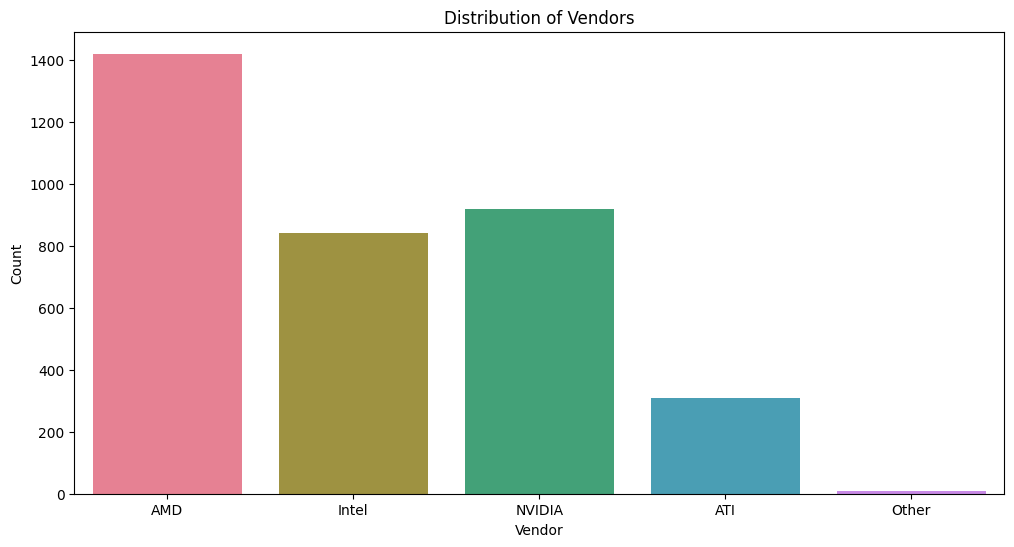

In [5]:
from src.my_package.exploratory_data_analysis import EDA  # noqa: E402
EDA_part = EDA(df)
type_distribution_sns = EDA_part.vendor_distribution_sns()

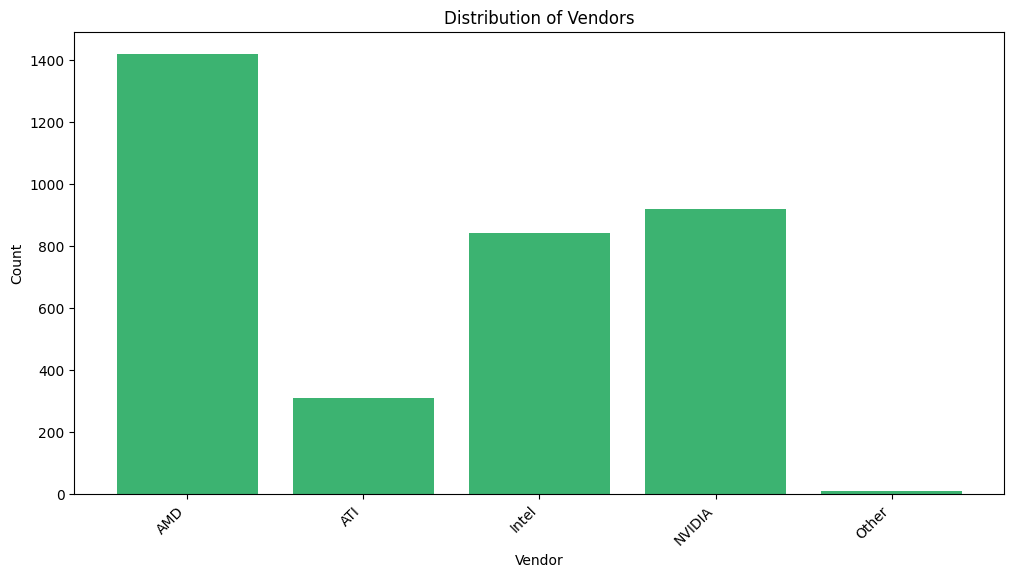

In [6]:
type_distribution_plt = EDA_part.vendor_distribution_plt()

<Figure size 1200x600 with 0 Axes>

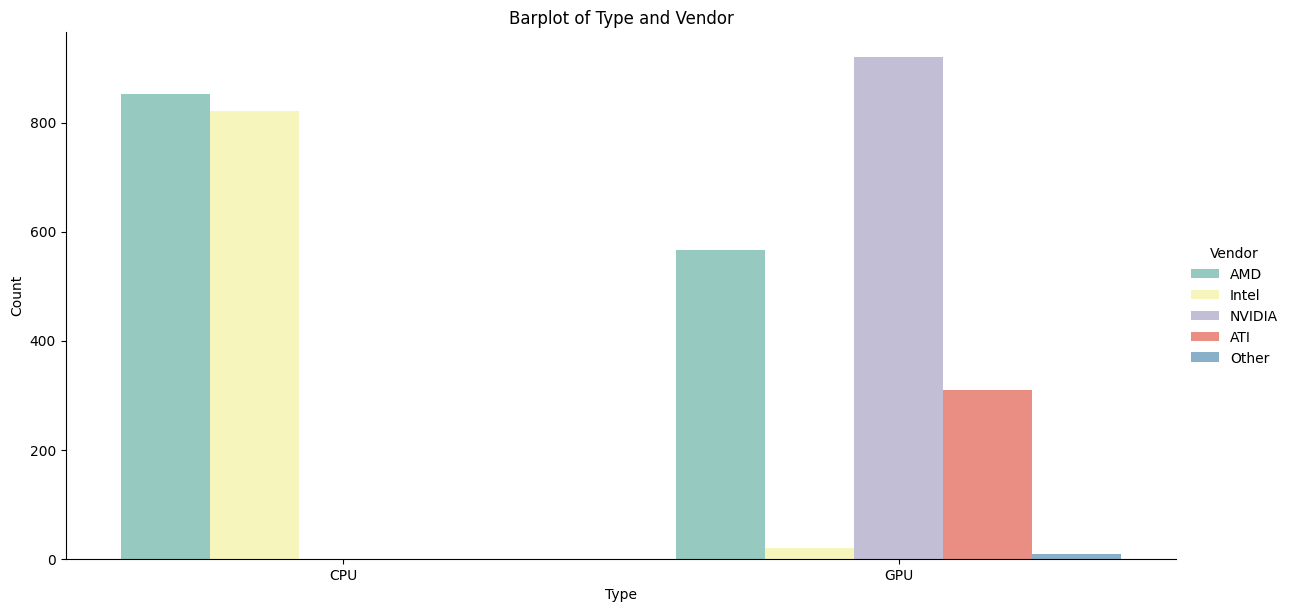

In [7]:
product_vendor_sns = EDA_part.type_vendor_sns()

<Figure size 1200x600 with 0 Axes>

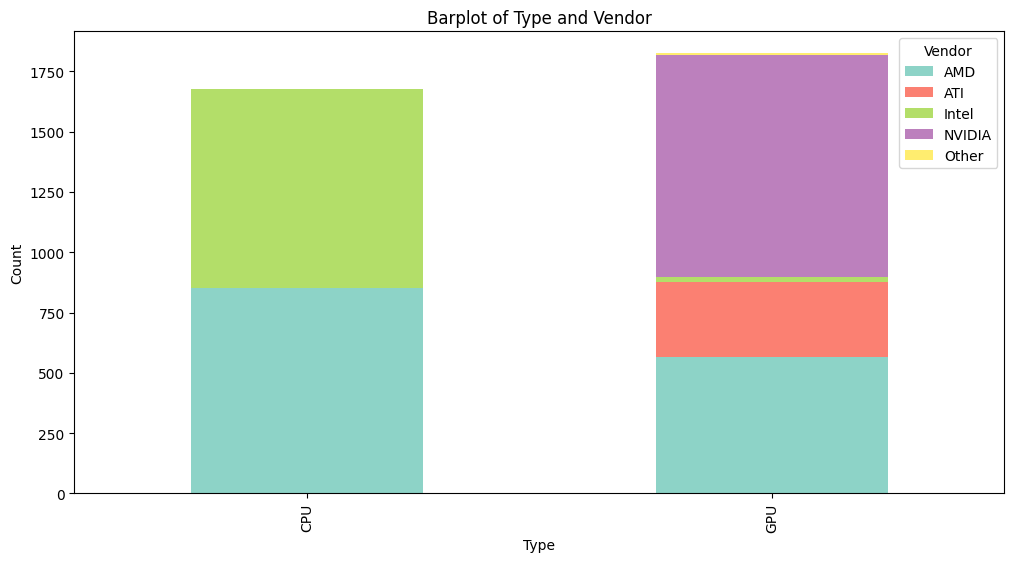

In [8]:
product_vendor_plt = EDA_part.type_vendor_plt()

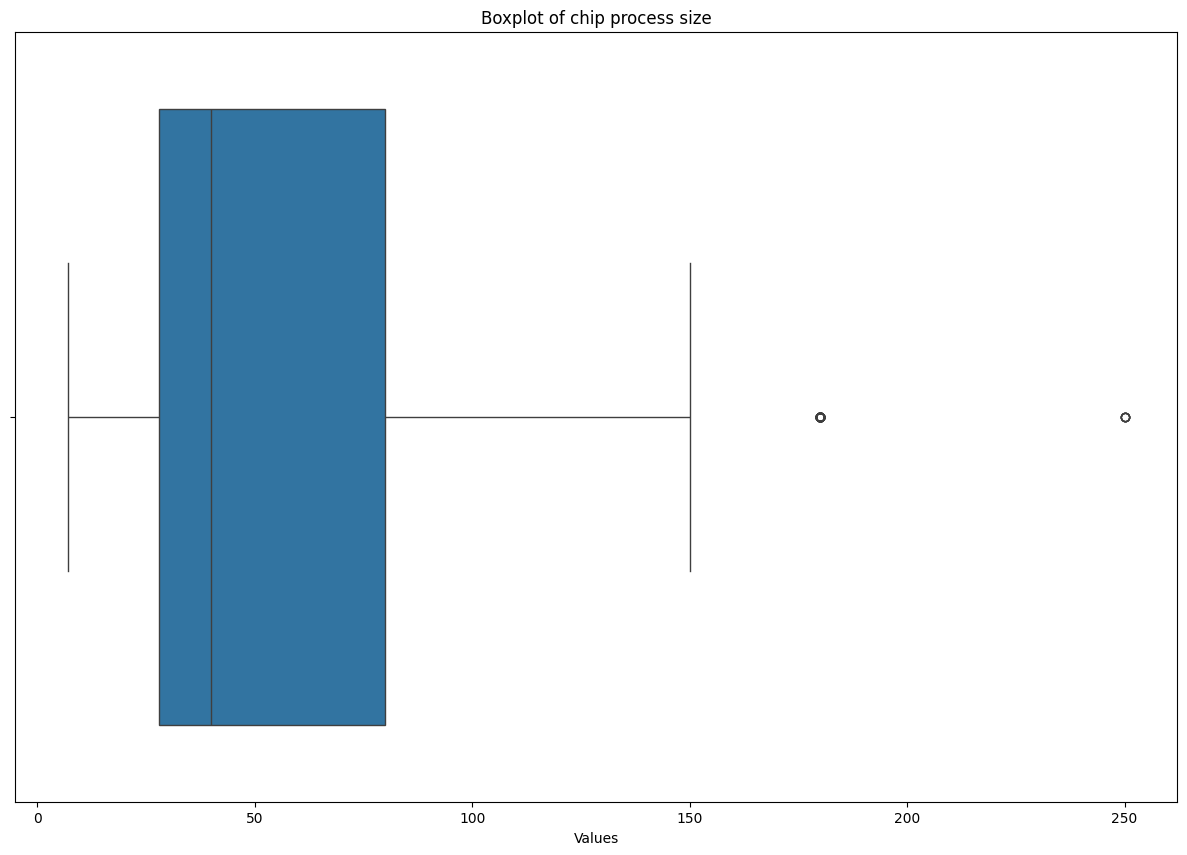

In [9]:
process_size_sns = EDA_part.process_size_sns()

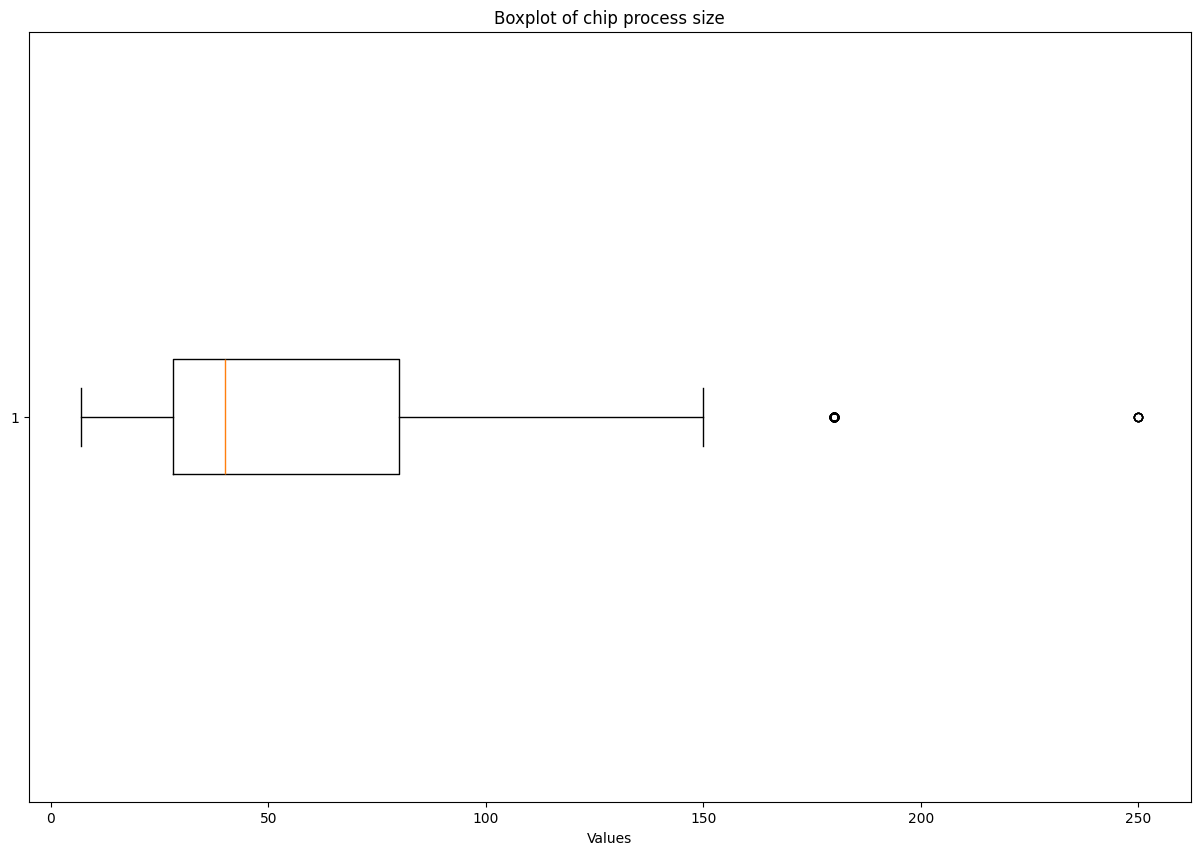

In [10]:
process_size_plt = EDA_part.process_size_plt()

/Users/lizhengnan/Desktop/project-3/Project-3-Data-Reconstruction-and-Analysis/src/my_package/exploratory_data_analysis.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vendor", y="TDP", data=self.df, palette="Set3")


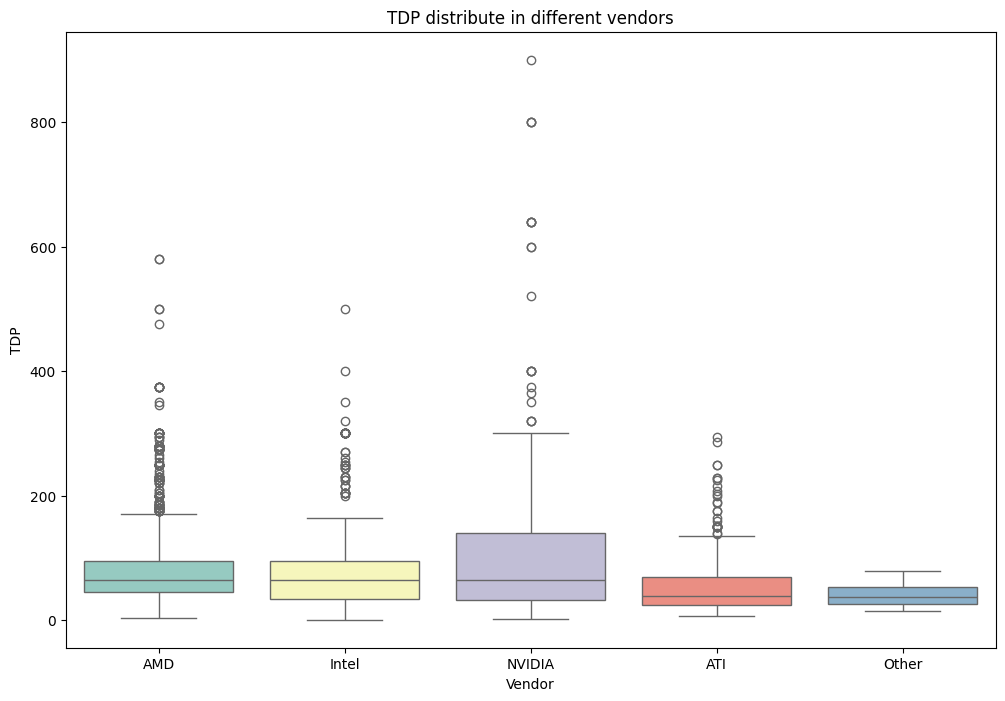

In [11]:
release_date_sns = EDA_part.TDP_distribution_sns()

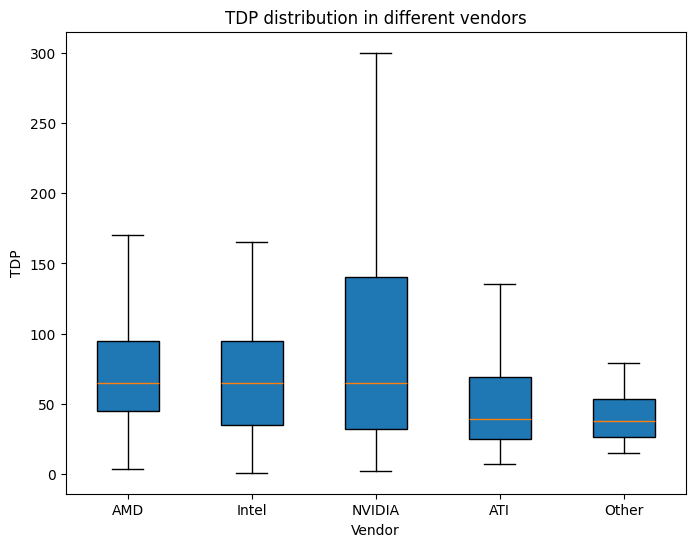

In [12]:
release_date_plt = EDA_part.TDP_distribution_plt()